<a href="https://colab.research.google.com/github/owlajm/-/blob/main/%EC%82%BC%EC%82%BC%EC%98%A4%EC%98%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import os
import cv2
import zipfile
import requests
import glob as glob
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
import sklearn

In [3]:
def load_image(path):

  image = cv2.imread(path)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = np.expand_dims(image, axis=0)/255.0
  return image

In [4]:
import warnings
import logging
import absl
warnings.filterwarnings("ignore", module="absl")
logging.captureWarnings(True)
absl_logger = logging.getLogger("absl")
absl_logger.setLevel(logging.ERROR)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [5]:
model_url = 'https://tfhub.dev/google/HRNet/camvid-hrnetv2-w48/1'
seg_model = hub.load(model_url)

In [17]:
# CamVid 공식 RGB 컬러 매핑
CLASS_COLOR_MAP = {
    0: [0, 0, 0],          # Unlabeled
    1: [128, 64, 128],     # Road
    2: [244, 35, 232],     # Sidewalk
    3: [70, 70, 70],       # Building
    4: [102, 102, 156],    # Wall
    5: [190, 153, 153],    # Fence
    6: [153, 153, 153],    # Pole
    7: [250, 170, 30],     # Traffic Light
    8: [220, 220, 0],      # Traffic Sign
    9: [107, 142, 35],     # Vegetation
    10: [0, 0, 142],       # Car
    11: [0, 0, 70],        # Truck
    12: [0, 60, 100],      # Bus
    13: [0, 80, 100],      # Train
    14: [230, 0, 0],       # Motorcycle
    15: [119, 11, 32],     # Bicycle
    16: [220, 20, 60],     # Person
    17: [255, 0, 0],       # Rider
}


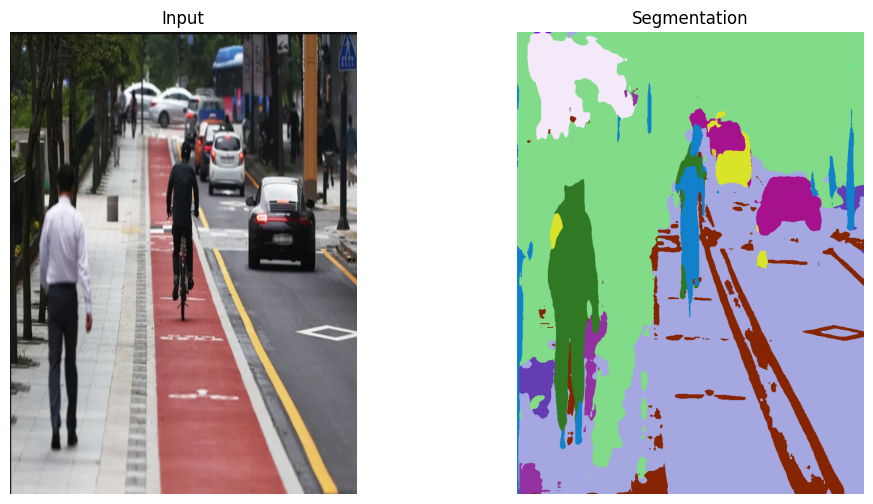

In [18]:
def load_image_resized(path, target_size=(720, 960)):
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, target_size)
    image = np.expand_dims(image, axis=0) / 255.0
    return image

CLASS_COLOR_MAP = {i: list(np.random.randint(0, 256, 3)) for i in range(32)}

def decode_segmentation(mask):
    h, w = mask.shape
    color_mask = np.zeros((h, w, 3), dtype=np.uint8)
    for class_id, color in CLASS_COLOR_MAP.items():
        color_mask[mask == class_id] = color
    return color_mask

# 로딩 및 추론
test_image = load_image_resized('도로.PNG')
result = seg_model(test_image)
pred_mask = tf.argmax(result, axis=-1)[0].numpy().astype(np.uint8)
seg_rgb = decode_segmentation(pred_mask)

# 시각화
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Input")
plt.imshow(test_image[0])
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Segmentation")
plt.imshow(seg_rgb)
plt.axis("off")
plt.show()


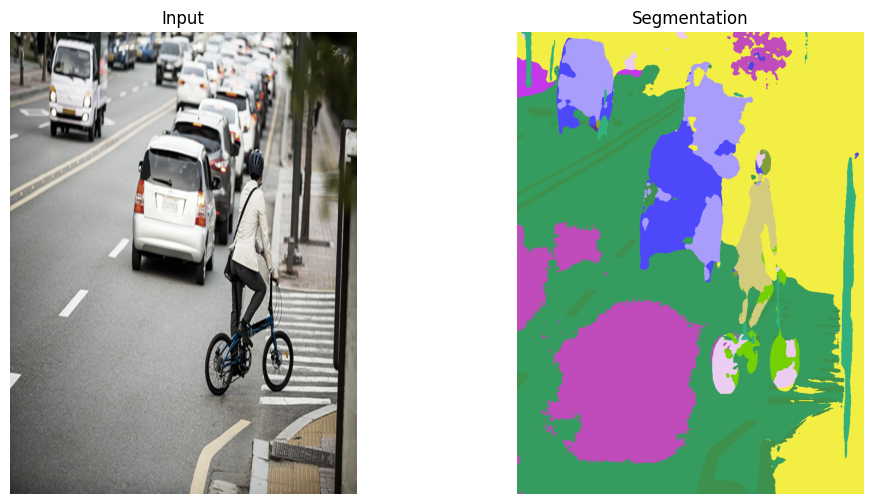

In [21]:
def load_image_resized(path, target_size=(720, 960)):
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, target_size)
    image = np.expand_dims(image, axis=0) / 255.0
    return image

CLASS_COLOR_MAP = {i: list(np.random.randint(0, 256, 3)) for i in range(32)}

def decode_segmentation(mask):
    h, w = mask.shape
    color_mask = np.zeros((h, w, 3), dtype=np.uint8)
    for class_id, color in CLASS_COLOR_MAP.items():
        color_mask[mask == class_id] = color
    return color_mask

# 로딩 및 추론
test_image = load_image_resized('도로2.jpg')
result = seg_model(test_image)
pred_mask = tf.argmax(result, axis=-1)[0].numpy().astype(np.uint8)
seg_rgb = decode_segmentation(pred_mask)

# 시각화
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Input")
plt.imshow(test_image[0])
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Segmentation")
plt.imshow(seg_rgb)
plt.axis("off")
plt.show()
